In [343]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray


In [344]:
# Define Data


xtrain: NDArray
ytrain: NDArray
xtest: NDArray
ytest: NDArray
lengthscale: float
variance: float
noise: float

In [345]:
# initializing the data
xtest = np.linspace(0, 5, 100).reshape(-1, 1)

xtrain = np.linspace(0, 5, 5).reshape(-1, 1)
ytrain = np.cos(xtrain).flatten()


lengthscale = .5
variance = 1

In [346]:
# kernel
def kernel23(xp, xq): # return SE kernel
    return np.exp(-.5*np.linalg.norm(xp - xq))
def kernel(x1, x2, lengthscale=.5, variance=1.0, noise=0):
    distance_squared = np.sum((x1[:, np.newaxis] - x2[np.newaxis, :]) ** 2, axis=-1)
    cov_matrix = variance * np.exp(-0.5 * (distance_squared / lengthscale**2))
    if not noise == 0:
        return cov_matrix + noise*np.eye(cov_matrix.shape[0])
    return cov_matrix
# mean
def sin_mean(x):# return constant mean
    return np.sin(x).reshape(-1,)
def const_mean(x):
    return np.ones_like(x).reshape(-1,)
def shape_printer(*X):
    for x in X:
        print(x.shape)

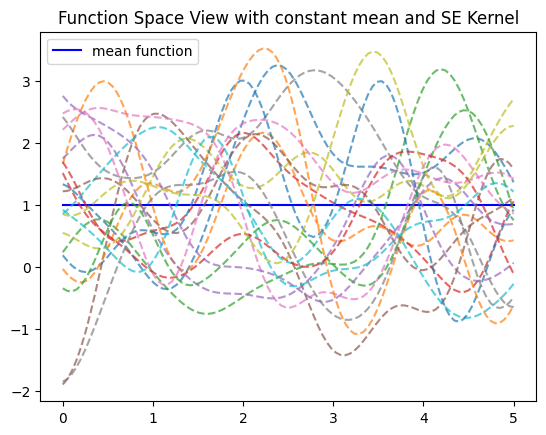

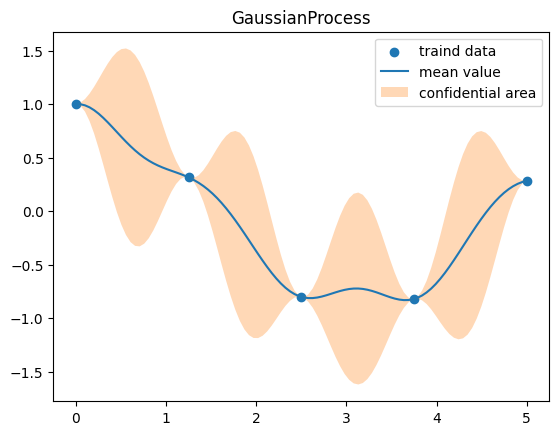

In [347]:
# noise free
# function space view
# PRIOR
mean_value = const_mean(xtest)
k_test_test = kernel(xtest, xtest)

num_samples = 20
samples = np.random.multivariate_normal(mean_value, k_test_test, num_samples)

plt.plot(xtest, mean_value, c='b', label='mean function')
plt.plot(xtest, samples.T, alpha=.7, linestyle='dashed')
plt.title("Function Space View with constant mean and SE Kernel")
plt.legend()
plt.show()

# POSTERIOR
k_train_train = kernel(xtrain, xtrain)
k_inv = np.linalg.inv(k_train_train)

k_star_train = kernel(xtest, xtrain)
k_train_test = kernel(xtrain, xtest)


mean_value = k_star_train @ (k_inv @ ytrain)
std = k_test_test - k_star_train @ (k_inv @ k_train_test)

plt.scatter(xtrain, ytrain, label='traind data')
plt.plot(xtest, mean_value, label='mean value')
plt.fill_between(xtest.flatten(), mean_value + 3/2*np.diag(std), mean_value - 3/2*np.diag(std), label='confidential area', alpha=.3)
plt.title("GaussianProcess")
plt.legend()
plt.show()

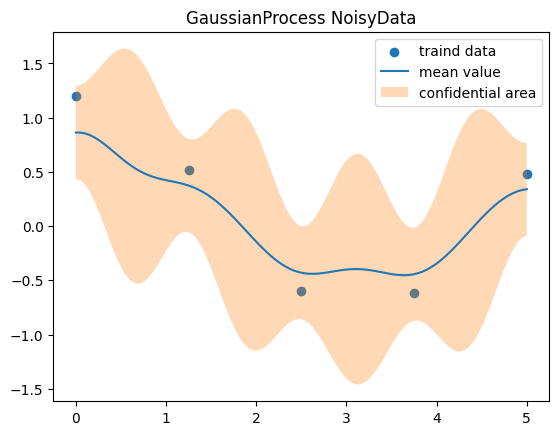

In [348]:
# with noise
# POSTERIOR
noise = .2
ytrain += noise
k_train_train = kernel(xtrain, xtrain, noise=noise)
k_inv = np.linalg.inv(k_train_train + noise*np.eye(k_train_train.shape[0]))

k_star_train = kernel(xtest, xtrain)
k_train_test = kernel(xtrain, xtest)


mean_value = k_star_train @ (k_inv @ ytrain)
std = k_test_test - k_star_train @ (k_inv @ k_train_test)

plt.scatter(xtrain, ytrain, label='traind data')
plt.plot(xtest, mean_value, label='mean value')
plt.fill_between(xtest.flatten(), mean_value + 1.5*np.diag(std), mean_value - 1.5*np.diag(std), label='confidential area', alpha=.3)
plt.title("GaussianProcess NoisyData")
plt.legend()
plt.show()